In [38]:
import pandas
import numpy
import sys
import umap
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import KernelPCA 

def main(val):
    url1 = direc + '/' + val + "_train"
    url2 = url1 + "_class"
    url3 = direc + '/' + val + "_test"
    url4 = url3 + "_class"
    _k = 1
    

    df_train = pandas.read_csv(url1, header=None, sep=' ')
    df_train_class = pandas.read_csv(url2, header=None, sep=' ')
    df_train_class = numpy.ravel(df_train_class, order='C')
    df_test = pandas.read_csv(url3, header=None, sep=' ')
    df_test_class = pandas.read_csv(url4, header=None, sep=' ')
    df_test_class = numpy.ravel(df_test_class, order='C')
    #print df_test_class

#     r1 = PCA_KNN(df_train, df_test, df_train_class, df_test_class, _k)
#     r2 = PCA_SVM(df_train, df_test, df_train_class, df_test_class, _k)
#     r3 = PCA_GNB(df_train, df_test, df_train_class, df_test_class, _k)
#     r4 = PCA_RF(df_train, df_test, df_train_class, df_test_class, _k)
#     r5 = PCA_SGD(df_train, df_test, df_train_class, df_test_class, _k)
#     r6 = PCA_LDA(df_train, df_test, df_train_class, df_test_class, _k)
    r7 = UMAP(df_train, df_test, df_train_class, df_test_class, _k)
#     r8 = KPCA(df_train, df_test, df_train_class, df_test_class, _k)
    #SelectKBest_KNN(df_train, df_test, df_train_class, df_test_class, _k)
    #SelectKBest_SVM(df_train, df_test, df_train_class, df_test_class, _k)
    #SelectKBest_GNB(df_train, df_test, df_train_class, df_test_class, _k)
#     SelectKBest_RF(df_train, df_test, df_train_class, df_test_class, _k)
#     SelectKBest_SGD(df_train, df_test, df_train_class, df_test_class, _k)
#     SelectKBest_LDA(df_train, df_test, df_train_class, df_test_class, _k)

#     url5 = direc2 + '/' + val
#     X_t_train = pandas.read_csv(url5+'_train', header=None, sep=' ')
#     X_t_test = pandas.read_csv(url5+'_test', header=None, sep=' ')

    #FT_KNN(X_t_train, X_t_test, df_train_class, df_test_class, _k)
    #FT_SVM(X_t_train, X_t_test, df_train_class, df_test_class, _k)
    #FT_GNB(X_t_train, X_t_test, df_train_class, df_test_class, _k)
#     FT_RF(X_t_train, X_t_test, df_train_class, df_test_class, _k)
#     FT_SGD(X_t_train, X_t_test, df_train_class, df_test_class, _k)
#     FT_LDA(X_t_train, X_t_test, df_train_class, df_test_class, _k)
    return r7

def PCA_KNN(X_train, X_test, y_train, y_test, _k):
    pca = PCA(n_components=_k)
    pca.fit(X_train)
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_t_train, y_train)
    return balanced_accuracy_score(y_test, neigh.predict(X_t_test))
    #print(f1_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
#     return 0


def PCA_SVM(X_train, X_test, y_train, y_test, _k):
    #print("PCA_SVM:"),
    pca = PCA(n_components=_k)
    pca.fit(X_train)
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)
    clf = SVC(kernel='linear', C=1)
    clf.fit(X_t_train, y_train)
    #print clf.predict(X_t_test)
    return balanced_accuracy_score(y_test, clf.predict(X_t_test))
    #print(f1_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
#     return 0

def PCA_GNB(X_train, X_test, y_train, y_test, _k):
    #print("PCA_GNB"),
    pca = PCA(n_components=_k)
    pca.fit(X_train)
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)
    gnb = GaussianNB()
    gnb.fit(X_t_train, y_train)
    return balanced_accuracy_score(y_test, gnb.predict(X_t_test))
    #print(f1_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
#     return 0

def PCA_RF(X_train, X_test, y_train, y_test, _k):
    #print("PCA_RF"),
    pca = PCA(n_components=_k)
    pca.fit(X_train)
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)
    rf = RandomForestClassifier(random_state=137)
    rf.fit(X_t_train, y_train)	
    return balanced_accuracy_score(y_test, rf.predict(X_t_test))
    #print(f1_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
#     return 0

def PCA_SGD(X_train, X_test, y_train, y_test, _k):
    #print("PCA_SGD"),
    pca = PCA(n_components=_k)
    pca.fit(X_train)
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)
    sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    sgd.fit(X_t_train, y_train)
    return balanced_accuracy_score(y_test, sgd.predict(X_t_test))
#     return 0

def PCA_LDA(X_train, X_test, y_train, y_test, _k):
    #print("PCA_LDA")
    pca = PCA(n_components=_k)
    pca.fit(X_train)
    X_t_train = pca.transform(X_train)
    X_t_test = pca.transform(X_test)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_t_train, y_train)
    return balanced_accuracy_score(y_test, lda.predict(X_t_test))
#     return 0


def SelectKBest_SVM(X_train, X_test, y_train, y_test, _k):
    #print("SelectKBest_SVM:"),
    selectKBest = SelectKBest(score_func=mutual_info_classif, k=_k)
    selectKBest.fit(X_train, y_train)
    X_t_train = selectKBest.transform(X_train)
    X_t_test = selectKBest.transform(X_test)
    clf = SVC(kernel='linear', C=1)
    clf.fit(X_t_train, y_train)
    print(balanced_accuracy_score(y_test, clf.predict(X_t_test)))
    #print(f1_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
    return 0

def SelectKBest_KNN(X_train, X_test, y_train, y_test, _k):
    #print("SelectKBest_SVM:"),
    selectKBest = SelectKBest(score_func=mutual_info_classif, k=_k)
    selectKBest.fit(X_train, y_train)
    X_t_train = selectKBest.transform(X_train)
    X_t_test = selectKBest.transform(X_test)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_t_train, y_train)
    print(balanced_accuracy_score(y_test, neigh.predict(X_t_test)))
    #print(f1_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
    return 0

def SelectKBest_GNB(X_train, X_test, y_train, y_test, _k):
    #print("SelectKBest_GNB:"),
    selectKBest = SelectKBest(score_func=mutual_info_classif, k=_k)
    selectKBest.fit(X_train, y_train)
    X_t_train = selectKBest.transform(X_train)
    X_t_test = selectKBest.transform(X_test)
    gnb = GaussianNB()
    gnb.fit(X_t_train, y_train)
    print(balanced_accuracy_score(y_test, gnb.predict(X_t_test)))
    #print(f1_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
    return 0

def SelectKBest_RF(X_train, X_test, y_train, y_test, _k):
    #print("SelectKBest_RF:"),
    selectKBest = SelectKBest(score_func=mutual_info_classif, k=_k)
    selectKBest.fit(X_train, y_train)
    X_t_train = selectKBest.transform(X_train)
    X_t_test = selectKBest.transform(X_test)
    rf = RandomForestClassifier(random_state=137)
    rf.fit(X_t_train, y_train)	
    print(balanced_accuracy_score(y_test, rf.predict(X_t_test)))
    #print(f1_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
    return 0

def SelectKBest_SGD(X_train, X_test, y_train, y_test, _k):
    #print("SelectKBest_SGD:"),
    selectKBest = SelectKBest(score_func=mutual_info_classif, k=_k)
    selectKBest.fit(X_train, y_train)
    X_t_train = selectKBest.transform(X_train)
    X_t_test = selectKBest.transform(X_test)
    sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    sgd.fit(X_t_train, y_train)
    print(balanced_accuracy_score(y_test, sgd.predict(X_t_test)))
    return 0

def SelectKBest_LDA(X_train, X_test, y_train, y_test, _k):
    #print("SelectKBest_LDA:"),
    selectKBest = SelectKBest(score_func=mutual_info_classif, k=_k)
    selectKBest.fit(X_train, y_train)
    X_t_train = selectKBest.transform(X_train)
    X_t_test = selectKBest.transform(X_test)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_t_train, y_train)
    print(balanced_accuracy_score(y_test, lda.predict(X_t_test)))
    return 0

def FT_SVM(X_t_train, X_t_test, y_train, y_test, _k):
    #print("FT_SVM:"),
    clf = SVC(kernel='linear', C=1)
    clf.fit(X_t_train, y_train)
    #print clf.predict(X_t_test)
    print(balanced_accuracy_score(y_test, clf.predict(X_t_test)))
    #print(f1_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, clf.predict(X_t_test), average='binary'), end=" ", flush=True)
    return 0

def FT_KNN(X_t_train, X_t_test, y_train, y_test, _k):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_t_train, y_train)
    print(balanced_accuracy_score(y_test, neigh.predict(X_t_test)))
    #print(f1_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, neigh.predict(X_t_test), average='binary'), end=" ", flush=True)
    return 0

def FT_GNB(X_t_train, X_t_test, y_train, y_test, _k):
    #print("FT_GNB:"),
    gnb = GaussianNB()
    gnb.fit(X_t_train, y_train)
    #print gnb.predict(X_t_test)
    print(balanced_accuracy_score(y_test, gnb.predict(X_t_test)))
    #print(f1_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, gnb.predict(X_t_test), average='binary'), end=" ", flush=True)
    return 0

def FT_RF(X_t_train, X_t_test, y_train, y_test, _k):
    #print("FT_RF:"),
    rf = RandomForestClassifier(random_state=137)
    rf.fit(X_t_train, y_train)
    #print rf.predict(X_t_test)	
    print(balanced_accuracy_score(y_test, rf.predict(X_t_test)))
    #print(f1_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(precision_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
    #print(recall_score(y_test, rf.predict(X_t_test), average='binary'), end=" ", flush=True)
    return 0

def FT_SGD(X_t_train, X_t_test, y_train, y_test, _k):
    #print("FT_SGD:"),
    sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    sgd.fit(X_t_train, y_train)
    print(balanced_accuracy_score(y_test, sgd.predict(X_t_test)))
    return 0

def FT_LDA(X_t_train, X_t_test, y_train, y_test, _k):
    #print("FT_LDA:"),
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_t_train, y_train)
    print(balanced_accuracy_score(y_test, lda.predict(X_t_test)))
    return 0



def KNN(x, y, xt, yt):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x, y)
    return balanced_accuracy_score(yt, neigh.predict(xt))

def SVM(x, y, xt, yt):
    clf = SVC(kernel='linear', C=1)
    clf.fit(x, y)
    return balanced_accuracy_score(yt, clf.predict(xt))

def GNB(x, y, xt, yt):
    gnb = GaussianNB()
    gnb.fit(x, y)
    return balanced_accuracy_score(yt, gnb.predict(xt))

def RF(x, y, xt, yt):
    rf = RandomForestClassifier(random_state=137)
    rf.fit(x, y)
    return balanced_accuracy_score(yt, rf.predict(xt))

def SGD(x, y, xt, yt):
    sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    sgd.fit(x, y)
    return balanced_accuracy_score(yt, sgd.predict(xt))

def LDA(x, y, xt, yt):
    lda = LinearDiscriminantAnalysis()
    lda.fit(x, y)
    return balanced_accuracy_score(yt, lda.predict(xt))
    
    

def UMAP(X_train, X_test, y_train, y_test, _k):
    mapper = umap.UMAP(n_neighbors=20).fit(X_train, y_train)
    x = mapper.transform(X_train)
    xt = mapper.transform(X_test)
    return [KNN(x, y_train, xt, y_test), SVM(x, y_train, xt, y_test), GNB(x, y_train, xt, y_test), RF(x, y_train, xt, y_test), SGD(x, y_train, xt, y_test), LDA(x, y_train, xt, y_test)]

def KPCA(X_train, X_test, y_train, y_test, _k):
    pca = KernelPCA(n_components=_k, kernel='poly')
    pca.fit(X_train)
    x = pca.transform(X_train)
    xt = pca.transform(X_test)
    return [KNN(x, y_train, xt, y_test), SVM(x, y_train, xt, y_test), GNB(x, y_train, xt, y_test), RF(x, y_train, xt, y_test), SGD(x, y_train, xt, y_test), LDA(x, y_train, xt, y_test)]

    


In [164]:
import os

In [135]:
direc = '/Users/aad/Feature_Transform_Proj/aaditya/real_ds_code_lungcancer_0.1/Exp1_0.1/LungCancer_Dataset'
direc2 = '/Users/aad/Feature_Transform_Proj/aaditya/real_ds_code_lungcancer_0.1/Exp1_0.1/LungCancer_Transformed_Train_Test_Data'
val = os.listdir(direc)
val.sort()

In [136]:
val

['lungcancer_1_test',
 'lungcancer_1_test_class',
 'lungcancer_1_train',
 'lungcancer_1_train_class',
 'lungcancer_2_test',
 'lungcancer_2_test_class',
 'lungcancer_2_train',
 'lungcancer_2_train_class',
 'lungcancer_3_test',
 'lungcancer_3_test_class',
 'lungcancer_3_train',
 'lungcancer_3_train_class',
 'lungcancer_4_test',
 'lungcancer_4_test_class',
 'lungcancer_4_train',
 'lungcancer_4_train_class',
 'lungcancer_5_test',
 'lungcancer_5_test_class',
 'lungcancer_5_train',
 'lungcancer_5_train_class']

In [73]:

spr = [0.1, 0.15, 0.2, 0.25, 0.3]
result = []
for s in spr:
    lis = []
    direc = '/Users/aad/Feature_Transform_Proj/LungCancer/LungCancer_Dataset_'+str(s)
    print(direc)
    for x in range(1,6):
        print ('lungcancer_'+ str(x))
        lis.append(main('lungcancer_'+ str(x)))    
    result.append(lis)
print(result)

/Users/aad/Feature_Transform_Proj/LungCancer/LungCancer_Dataset_0.1
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
/Users/aad/Feature_Transform_Proj/LungCancer/LungCancer_Dataset_0.15
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
/Users/aad/Feature_Transform_Proj/LungCancer/LungCancer_Dataset_0.2
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
/Users/aad/Feature_Transform_Proj/LungCancer/LungCancer_Dataset_0.25
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
/Users/aad/Feature_Transform_Proj/LungCancer/LungCancer_Dataset_0.3
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
[[[0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.9, 0.9, 0.9, 0.9, 0.9, 0.9]], [[0.8376623376623377, 0.8376623376623377, 0.8376623376623377, 0.8376623376623377, 0.9090909090909092, 0.8376623376623377], [0.8888888888888888, 0.888888

In [78]:
final_result = []
for i in result: 
    z = [sum(x)/5 for x in zip(i[0], i[1], i[2], i[3], i[4])]
    final_result.append(z)


for j in final_result:
    print(j)
        
    

[0.9675, 0.9675, 0.9675, 0.9675, 0.9675, 0.9675]
[0.9251082251082252, 0.9251082251082252, 0.9251082251082252, 0.9028860028860027, 0.9282828282828284, 0.9251082251082252]
[0.9347619047619048, 0.9347619047619048, 0.9347619047619048, 0.9347619047619048, 0.8991558441558443, 0.9347619047619048]
[0.8874159663865546, 0.8874159663865546, 0.8874159663865546, 0.8874159663865546, 0.8678326330532213, 0.8874159663865546]
[0.9166841656571094, 0.9166841656571094, 0.9123363395701529, 0.9079885134831965, 0.9114210077623726, 0.9123363395701529]


In [2]:
#KPCA
spr = [0.1, 0.15, 0.2, 0.25, 0.3]
result = []
for s in spr:
    lis = []
    direc = '/Users/aad/Feature_Transform_Proj/BreastCancer/BreastCancer_Dataset_'+str(s)
    print(direc)
    for x in range(1,6):
        print ('breastcancer_'+ str(x))
        lis.append(main('breastcancer_'+ str(x)))    
    result.append(lis)
print(result)

/Users/aad/Feature_Transform_Proj/BreastCancer/BreastCancer_Dataset_0.1
breastcancer_1
breastcancer_2
breastcancer_3
breastcancer_4
breastcancer_5
/Users/aad/Feature_Transform_Proj/BreastCancer/BreastCancer_Dataset_0.15
breastcancer_1
breastcancer_2
breastcancer_3
breastcancer_4
breastcancer_5
/Users/aad/Feature_Transform_Proj/BreastCancer/BreastCancer_Dataset_0.2
breastcancer_1
breastcancer_2
breastcancer_3
breastcancer_4
breastcancer_5
/Users/aad/Feature_Transform_Proj/BreastCancer/BreastCancer_Dataset_0.25
breastcancer_1
breastcancer_2
breastcancer_3
breastcancer_4
breastcancer_5
/Users/aad/Feature_Transform_Proj/BreastCancer/BreastCancer_Dataset_0.3
breastcancer_1
breastcancer_2
breastcancer_3
breastcancer_4
breastcancer_5
[[[0.5, 0.5, 0.5, 0.75, 0.8571428571428572, 0.5], [0.525, 0.4, 0.4, 0.3, 0.4, 0.4], [0.65, 0.625, 0.625, 0.525, 0.75, 0.625], [1.0, 0.75, 0.5, 0.6785714285714286, 0.5, 0.5], [0.8571428571428572, 0.7857142857142857, 0.8571428571428572, 0.8571428571428572, 0.785714

In [79]:
for i in result:
    v0 =0
    v1 =0
    v2 =0
    v3 =0
    v4 =0
    for j in range(5):
#         print(i[j])
        v0+=i[j][0]/5
        v1+=i[j][1]/5
        v2+=i[j][2]/5
        v3+=i[j][3]/5
        v4+=i[j][4]/5
#     v0/=5, v1/=5, v2/=5, v3/=5, v4/=5
    print(v0, v1, v2, v3, v4)

0.9675 0.9675 0.9675 0.9675 0.9675
0.925108225108225 0.925108225108225 0.925108225108225 0.9028860028860028 0.9282828282828284
0.9347619047619047 0.9347619047619047 0.9347619047619047 0.9347619047619047 0.8991558441558442
0.8874159663865546 0.8874159663865546 0.8874159663865546 0.8874159663865546 0.8678326330532212
0.9166841656571094 0.9166841656571094 0.9123363395701529 0.9079885134831964 0.9114210077623726


In [23]:
#Linear KPCA
spr = [0.1,0.15,0.2,0.25,0.3]
result = []
for s in spr:
    lis = []
    direc = '/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_'+str(s)
    print(direc)
    for x in range(1,6):
        print ('lungcancer_'+ str(x))
        lis.append(main('lungcancer_'+ str(x)))    
    result.append(sum(lis)/5)
print(result)

/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_0.1
lungcancer_1
lungcancer_2


KeyboardInterrupt: 

In [3]:
#PCA
spr = [0.1,0.15,0.2,0.25,0.3]
result = []
for s in spr:
    lis = []
    direc = '/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_'+str(s)
    print(direc)
    for x in range(1,6):
        print ('lungcancer_'+ str(x))
        lis.append(main('lungcancer_'+ str(x)))    
#     result.append(sum(lis)/5)
print(result)

/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_0.1
lungcancer_1


KeyboardInterrupt: 

In [166]:
#Polynomial kernel PCA
spr = [0.1,0.15,0.2,0.25,0.3]
result = []
for s in spr:
    lis = []
    direc = '/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_'+str(s)
    print(direc)
    for x in range(1,6):
        print ('lungcancer_'+ str(x))
        lis.append(main('lungcancer_'+ str(x)))    
    result.append(sum(lis)/5)
print(result)

/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_0.1
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_0.15
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_0.2
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_0.25
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
/Users/aad/Feature_Transform_Proj/aaditya/LungCancer_Dataset_0.3
lungcancer_1
lungcancer_2
lungcancer_3
lungcancer_4
lungcancer_5
[0.9857142857142858, 0.9341991341991343, 0.9260306360306361, 0.9187467679379445, 0.9369023581972835]


In [ ]:
#UMAP - Breast Cancer (column wise classifier)
[0.9103571428571428, 0.9103571428571428, 0.9103571428571428, 0.9103571428571428, 0.9103571428571428, 0.9103571428571428]
[0.8862626262626263, 0.8862626262626263, 0.8973737373737375, 0.8862626262626263, 0.8362626262626263, 0.8862626262626263]
[0.8738095238095237, 0.8738095238095237, 0.8738095238095237, 0.8738095238095237, 0.8488095238095237, 0.8738095238095237]
[0.9471611721611722, 0.9471611721611722, 0.9625457875457876, 0.9394688644688646, 0.9394688644688646, 0.9471611721611722]
[0.832529239766082, 0.832529239766082, 0.832529239766082, 0.8525292397660819, 0.8269736842105264, 0.832529239766082]

In [ ]:
#UMAP - Colon Cancer
[0.853455955808897, 0.853455955808897, 0.8905600282070869, 0.8391702415231826, 0.8339989422342363, 0.853455955808897]
[0.7661842105263158, 0.7661842105263158, 0.7767397660818715, 0.7611842105263158, 0.7348245614035088, 0.7606286549707603]
[0.8380026350461133, 0.8380026350461133, 0.8409117259552042, 0.8380026350461133, 0.843768868812347, 0.8380026350461133]
[0.867985809765565, 0.867985809765565, 0.8935966386022003, 0.8571392489190043, 0.8039311666786638, 0.8642821060618614]
[0.8563789874146412, 0.8563789874146412, 0.84855537432787, 0.8531531809630281, 0.8353676535000811, 0.8630456540813078]

In [ ]:
#UMAP - Lung Cancer
[0.9389285714285714, 0.9389285714285714, 0.9389285714285714, 0.9389285714285714, 0.9532142857142857, 0.9389285714285714]
[0.925108225108225, 0.925108225108225, 0.925108225108225, 0.918037518037518, 0.8513708513708513, 0.925108225108225]
[0.8875091575091574, 0.8875091575091574, 0.8875091575091574, 0.8803663003663005, 0.9265800865800866, 0.8875091575091574]
[0.8740653953889248, 0.8669225382460676, 0.8669225382460676, 0.888351109674639, 0.8610401853048911, 0.8597796811032105]
[0.8962238076008434, 0.8962238076008434, 0.8962238076008434, 0.8968430026472831, 0.9101763359806165, 0.8962238076008434]

In [ ]:
#KPCA- Colon Cancer
[0.8855479814303344, 0.8951948051948051, 0.9023376623376624, 0.8655180114003643, 0.8802215431627196, 0.7442857142857143]
[0.921140350877193, 0.8498955722639934, 0.85515873015873, 0.8677172096908938, 0.8531286549707602, 0.7543650793650793]
[0.8914270656879353, 0.8391262071262071, 0.8257928737928738, 0.8697459062676455, 0.8767212497647281, 0.7118414918414919]
[0.888792773990461, 0.8719249034049792, 0.8565887689511978, 0.85828049634902, 0.8631237001279695, 0.7330907491201609]
[0.8657651561978437, 0.8289312908370633, 0.8184686422801872, 0.8738819601062435, 0.833509700084403, 0.6815430622009568]

In [ ]:
#KPCA - Breast Cancer
[0.5504761904761905, 0.5214285714285715, 0.5464285714285715, 0.5478571428571428, 0.5047619047619047, 0.48571428571428565]
[0.5479292929292929, 0.4909090909090909, 0.4709090909090909, 0.5488383838383839, 0.422020202020202, 0.4909090909090909]
[0.5846320346320347, 0.5, 0.4920995670995671, 0.5287878787878787, 0.49480519480519475, 0.5]
[0.6170726495726496, 0.5, 0.49603174603174605, 0.5827991452991453, 0.466984126984127, 0.5]
[0.6041219470244238, 0.5141176470588235, 0.5030065359477124, 0.6004274165806673, 0.46104575163398687, 0.49411764705882355]

In [68]:
#KPCA - Lung Cancer
[0.9857142857142858, 0.9857142857142858, 0.9532142857142857, 0.9732142857142858, 0.9857142857142858, 0.9532142857142857]
[0.9341991341991343, 0.9544011544011543, 0.9310245310245311, 0.9230880230880232, 0.9432900432900432, 0.9219336219336218]
[0.9260306360306361, 0.9428138528138529, 0.9337229437229437, 0.8929786879786882, 0.8209523809523809, 0.9174891774891775]
[0.9187467679379445, 0.9133406054729584, 0.8749582525317819, 0.8665548911872442, 0.9066739388062917, 0.8749582525317819]
[0.9369023581972835, 0.9210257100551893, 0.9205375330910396, 0.9110137235672301, 0.9177646161439406, 0.8982465114192129]

In [28]:
import pandas
import numpy as np
import sys
from sklearn.model_selection import train_test_split

def datasplit(path, sr, kf, loc):
    url1 = path
    url2 = url1 + "_class"
    X = pandas.read_csv(url1, header=None, sep=' ')
    Y = pandas.read_csv(url2, header=None, sep=' ')
    Y = np.ravel(Y, order='C')
    fileName = url1[url1.rfind('/')+1:len(url1)]
    print(fileName)
    trainData_testData_path = loc
    kfold = kf
    testSize = sr

    for x in range(0, kfold):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testSize, random_state=x)

        df_train = pandas.DataFrame(data=X_train)
        df_train.to_csv(trainData_testData_path+str(fileName)+'_'+str(x+1)+'_train', sep=' ', index=False, header=False)

        df_test = pandas.DataFrame(data=X_test)
        df_test.to_csv(trainData_testData_path+str(fileName)+'_'+str(x+1)+'_test', sep=' ', index=False, header=False)

        with open(trainData_testData_path+str(fileName)+'_'+str(x+1)+'_train_class', "w") as y_trainFile:
            y_trainFile.write(" ".join(map(str, y_train.tolist())))

        with open(trainData_testData_path+str(fileName)+'_'+str(x+1)+'_test_class', "w") as y_testFile:
            y_testFile.write(" ".join(map(str, y_test.tolist())))

In [1]:
from os import listdir
from os.path import isfile, join
mypath = '/Users/aad/Feature_Transform_Proj/SYN_2'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [34]:
onlyfiles.sort()

l1 = [10.0, 15.0, 20.0]
l2 = [200, 300, 400]
l3 = [0.1, 0.15, 0.2, 0.25, 0.3]

count  = 0
for sr in l3:
#     outloc = os.mkdir(mypath+'/'+str(sr))
    outloc = mypath+'/'+str(sr)
    if not os.path.isdir(outloc):
        os.mkdir(outloc)
    for x in l1:
        for y in l2:
            for z in range(1, 11):
                s = '200_2_'+str(x)+'_'+str(y)+'_'+str(z)
                path = mypath +'/'+s
                datasplit(path, sr, 5, outloc+'/')
                print(path)
            

200_2_10.0_200_1
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_1
200_2_10.0_200_2
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_2
200_2_10.0_200_3
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_3
200_2_10.0_200_4
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_4
200_2_10.0_200_5
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_5
200_2_10.0_200_6
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_6
200_2_10.0_200_7
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_7
200_2_10.0_200_8
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_8
200_2_10.0_200_9
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_9
200_2_10.0_200_10
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_200_10
200_2_10.0_300_1
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_300_1
200_2_10.0_300_2
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_300_2
200_2_10.0_300_3
/Users/aad/Feature_Transform_Proj/SYN_2/200_2_10.0_300_3
200_2_10.0_300_4
/Users/aad/Feature_

In [47]:
spr = [0.1, 0.15, 0.2, 0.25, 0.3]
result = []
for x in l1:
    for y in l2:
        lis=[]
        for z in range(1, 11):
            s = '200_2_'+str(x)+'_'+str(y)+'_'+str(z)
            for sr in spr:
                direc = mypath+'/'+str(sr)
                print(direc)
                for w in range(1,6):
                    print (s + '_' + str(w))
                    lis.append(main(s + '_' + str(w)))    
        result.append(lis) 
print(result)

/Users/aad/Feature_Transform_Proj/SYN_2/0.1
200_2_10.0_200_1_1
200_2_10.0_200_1_2
200_2_10.0_200_1_3
200_2_10.0_200_1_4
200_2_10.0_200_1_5
/Users/aad/Feature_Transform_Proj/SYN_2/0.15
200_2_10.0_200_1_1
200_2_10.0_200_1_2
200_2_10.0_200_1_3
200_2_10.0_200_1_4
200_2_10.0_200_1_5
/Users/aad/Feature_Transform_Proj/SYN_2/0.2
200_2_10.0_200_1_1
200_2_10.0_200_1_2
200_2_10.0_200_1_3
200_2_10.0_200_1_4
200_2_10.0_200_1_5
/Users/aad/Feature_Transform_Proj/SYN_2/0.25
200_2_10.0_200_1_1
200_2_10.0_200_1_2
200_2_10.0_200_1_3
200_2_10.0_200_1_4
200_2_10.0_200_1_5
/Users/aad/Feature_Transform_Proj/SYN_2/0.3
200_2_10.0_200_1_1
200_2_10.0_200_1_2
200_2_10.0_200_1_3
200_2_10.0_200_1_4
200_2_10.0_200_1_5
/Users/aad/Feature_Transform_Proj/SYN_2/0.1
200_2_10.0_200_2_1
200_2_10.0_200_2_2
200_2_10.0_200_2_3
200_2_10.0_200_2_4
200_2_10.0_200_2_5
/Users/aad/Feature_Transform_Proj/SYN_2/0.15
200_2_10.0_200_2_1
200_2_10.0_200_2_2
200_2_10.0_200_2_3
200_2_10.0_200_2_4
200_2_10.0_200_2_5
/Users/aad/Feature_Trans

In [84]:
rs = []
for val in result:
    xx = [0,0,0,0,0,0]
    for i in val:
        print(xx)
        print(i)
        xx = [a+b for a,b in zip(xx, i)]
        print('--->', xx)
    rs.append(xx)
        
        

[0, 0, 0, 0, 0, 0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
---> [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
---> [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
---> [3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
---> [4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333, 0.9583333333333333]
---> [4.958333333333333, 4.958333333333333, 4.958333333333333, 4.958333333333333, 4.958333333333333, 4.958333333333333]
[4.958333333333333, 4.958333333333333, 4.958333333333333, 4.958333333333333, 4.958333333333333, 4.958333333333333]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
---> [5.958333333333333, 5.958333333333333, 5.958333333333333, 5.958333333333333, 5.958333333333333, 5.958333333333333]
[5.958333333333333, 5.958333333333333, 5.958333333333333, 5.958333333333333, 5.958

In [85]:
slv = []
for sl in rs:
    slv.append([round((x/250)*100)/100 for x in sl])

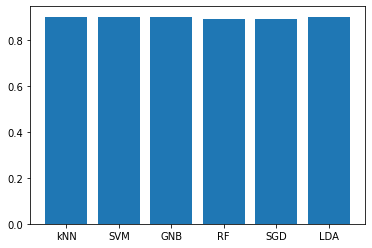

In [91]:
import matplotlib.pyplot as plt
langs = ['kNN', 'SVM', 'GNB', 'RF', 'SGD', 'LDA']
data = slv[4]
plt.bar(langs, data)
plt.show()

In [45]:
string = """0.10 & 0.85 & 0.85 & 0.82 & 0.84 & \textbf{0.87} & 0.86 & 0.85 & 0.80 & 0.83 & \textbf{0.88} & \textbf{0.88} & 0.86 & 0.85 & 0.85 & 0.74 \\ 
0.15 & 0.85 & 0.83 & \textbf{0.87} & 0.76 & \textbf{0.87} & \textbf{0.86} & 0.85 & 0.80 & 0.73 & 0.85 & 0.86 & 0.85 & \textbf{0.89} & 0.76 & 0.75 \\ 
0.2 & \textbf{0.88} & 0.83 & \textbf{0.88} & 0.84 & 0.87 & \textbf{0.91} & 0.84 & 0.85 & 0.84 & 0.88 & 0.87 & 0.83 & \textbf{0.89} & 0.84 & 0.71 \\ 
0.25 & \textbf{0.88} & 0.84 & 0.87 & 0.86 & 0.86 &\textbf{ 0.90} & 0.87 & 0.83 & 0.80 & 0.86 & \textbf{0.87} & 0.85 & 0.87 & 0.86 & 0.73 \\ 
0.3 & 0.85 & 0.86 & \textbf{0.88} & 0.85 & 0.87 & \textbf{0.88} & \textbf{0.88} & 0.81 & 0.84 & 0.83 & 0.86 & 0.84 & \textbf{0.87} & 0.86 & 0.68"""

In [46]:
y = string.split('&')

In [47]:
len(y)

76

In [48]:
l = []
for i in range(len(y)):
    u = y[i]
    print(u)
#     print("____")
    print(u.find('\\'))
    if(u.find('\\')!=-1):
        x1 = u.split("\\ \n")[0]
        x2 = u.split("\\ \n")[1]
        if(x1.find('{')!=-1):
            x1 = x1.split('{')[1].split('}')[0]
        l.append(x1.replace(" ",""))
        l.append(x2.replace(" ",""))
#         print("inif", x1,x2)
        
    elif(len(u.split('{'))==2):
        u = u.split('{')[1].split('}')[0]
        l.append(u)
        print("inelif", u)
    else:
        print("inelse", u)
        l.append(u.replace(" ",""))
    
l.append(y[-1].replace(' ','').replace('\\', '')) 
if(l[-1].find('{')!=-1):
            l[-1] = l[-1].split('{')[1].split('}')[0]

    

0.10 
-1
inelse 0.10 
 0.85 
-1
inelse  0.85 
 0.85 
-1
inelse  0.85 
 0.82 
-1
inelse  0.82 
 0.84 
-1
inelse  0.84 
 	extbf{0.87} 
-1
inelif 0.87
 0.86 
-1
inelse  0.86 
 0.85 
-1
inelse  0.85 
 0.80 
-1
inelse  0.80 
 0.83 
-1
inelse  0.83 
 	extbf{0.88} 
-1
inelif 0.88
 	extbf{0.88} 
-1
inelif 0.88
 0.86 
-1
inelse  0.86 
 0.85 
-1
inelse  0.85 
 0.85 
-1
inelse  0.85 
 0.74 \ 
0.15 
6
 0.85 
-1
inelse  0.85 
 0.83 
-1
inelse  0.83 
 	extbf{0.87} 
-1
inelif 0.87
 0.76 
-1
inelse  0.76 
 	extbf{0.87} 
-1
inelif 0.87
 	extbf{0.86} 
-1
inelif 0.86
 0.85 
-1
inelse  0.85 
 0.80 
-1
inelse  0.80 
 0.73 
-1
inelse  0.73 
 0.85 
-1
inelse  0.85 
 0.86 
-1
inelse  0.86 
 0.85 
-1
inelse  0.85 
 	extbf{0.89} 
-1
inelif 0.89
 0.76 
-1
inelse  0.76 
 0.75 \ 
0.2 
6
 	extbf{0.88} 
-1
inelif 0.88
 0.83 
-1
inelse  0.83 
 	extbf{0.88} 
-1
inelif 0.88
 0.84 
-1
inelse  0.84 
 0.87 
-1
inelse  0.87 
 	extbf{0.91} 
-1
inelif 0.91
 0.84 
-1
inelse  0.84 
 0.85 
-1
inelse  0.85 
 0.84 
-1
inelse  0.8

In [40]:
l.append(y[-1].replace(' ','').replace('\\', ''))

In [49]:
l[-1]

'0.68'

In [50]:
lst = []
li = []
for i in range(len(l)):
    li.append(l[i])
    if((i+1)%16==0):
        print(li)
        lst.append(li)
        li = []
print(li)

['0.10', '0.85', '0.85', '0.82', '0.84', '0.87', '0.86', '0.85', '0.80', '0.83', '0.88', '0.88', '0.86', '0.85', '0.85', '0.74']
['0.15', '0.85', '0.83', '0.87', '0.76', '0.87', '0.86', '0.85', '0.80', '0.73', '0.85', '0.86', '0.85', '0.89', '0.76', '0.75']
['0.2', '0.88', '0.83', '0.88', '0.84', '0.87', '0.91', '0.84', '0.85', '0.84', '0.88', '0.87', '0.83', '0.89', '0.84', '0.71']
['0.25', '0.88', '0.84', '0.87', '0.86', '0.86', ' 0.90', '0.87', '0.83', '0.80', '0.86', '0.87', '0.85', '0.87', '0.86', '0.73']
['0.3', '0.85', '0.86', '0.88', '0.85', '0.87', '0.88', '0.88', '0.81', '0.84', '0.83', '0.86', '0.84', '0.87', '0.86', '0.68']
['0.68']


In [51]:
v1 = [['0.10', '0.86', '0.86', '0.85', '0.85', '0.89', '0.86', '0.86', '0.85', '0.85', '0.9', '0.88', '0.87', '0.85', '0.89', '0.90'],
['0.15', '0.87', '0.85', '0.85', '0.77', '0.92', '0.92', '0.87', '0.87', '0.77', '0.85', '0.87', '0.87', '0.89', '0.78', '0.86'],
['0.20', '0.88', '0.86', '0.86', '0.84', '0.88', '0.91', '0.86', '0.88', '0.84', '0.84', '0.87', '0.86', '0.89', '0.84', '0.83'],
['0.25', '0.88', '0.86', '0.85', '0.87', '0.88', '0.90', '0.86', '0.85', '0.87', '0.87', '0.89', '0.86', '0.87', '0.89', '0.86'],
['0.30', '0.89', '0.85', '0.85', '0.86', '0.87', '0.91', '0.87', '0.86', '0.86', '0.83', '0.88', '0.85', '0.87', '0.85', '0.82']]

v2 = [['0.10', '0.85', '0.85', '0.82', '0.84', '0.87', '0.86', '0.85', '0.80', '0.83', '0.88', '0.88', '0.86', '0.85', '0.85', '0.74'],
['0.15', '0.85', '0.83', '0.87', '0.76', '0.87', '0.86', '0.85', '0.80', '0.73', '0.85', '0.86', '0.85', '0.89', '0.76', '0.75'],
['0.2', '0.88', '0.83', '0.88', '0.84', '0.87', '0.91', '0.84', '0.85', '0.84', '0.88', '0.87', '0.83', '0.89', '0.84', '0.71'],
['0.25', '0.88', '0.84', '0.87', '0.86', '0.86', ' 0.90', '0.87', '0.83', '0.80', '0.86', '0.87', '0.85', '0.87', '0.86', '0.73'],
['0.3', '0.85', '0.86', '0.88', '0.85', '0.87', '0.88', '0.88', '0.81', '0.84', '0.83', '0.86', '0.84', '0.87', '0.86', '0.68']]

In [62]:
# [sum(x) / len(x) for x in zip(*v1)]
for i in range(len(v2)):
    v2[i] = [float(i) for i in v2[i]]

In [63]:
v1_r = [sum(x) / len(x) for x in zip(*v1)]
v2_r = [sum(x) / len(x) for x in zip(*v2)]

In [74]:
vr_r = v1_r + v2_r
print(len(vr_r))

30


In [410]:
uc = [[0.853455955808897, 0.853455955808897, 0.8905600282070869, 0.8391702415231826, 0.8339989422342363, 0.853455955808897],
[0.7661842105263158, 0.7661842105263158, 0.7767397660818715, 0.7611842105263158, 0.7348245614035088, 0.7606286549707603],
[0.8380026350461133, 0.8380026350461133, 0.8409117259552042, 0.8380026350461133, 0.843768868812347, 0.8380026350461133],
[0.867985809765565, 0.867985809765565, 0.8935966386022003, 0.8571392489190043, 0.8039311666786638, 0.8642821060618614],
[0.8563789874146412, 0.8563789874146412, 0.84855537432787, 0.8531531809630281, 0.8353676535000811, 0.8630456540813078]]

kc = [[0.8855479814303344, 0.8951948051948051, 0.9023376623376624, 0.8655180114003643, 0.8802215431627196, 0.7442857142857143],
[0.921140350877193, 0.8498955722639934, 0.85515873015873, 0.8677172096908938, 0.8531286549707602, 0.7543650793650793],
[0.8914270656879353, 0.8391262071262071, 0.8257928737928738, 0.8697459062676455, 0.8767212497647281, 0.7118414918414919],
[0.888792773990461, 0.8719249034049792, 0.8565887689511978, 0.85828049634902, 0.8631237001279695, 0.7330907491201609],
[0.8657651561978437, 0.8289312908370633, 0.8184686422801872, 0.8738819601062435, 0.833509700084403, 0.6815430622009568]]

ub = [[0.9103571428571428, 0.9103571428571428, 0.9103571428571428, 0.9103571428571428, 0.9103571428571428, 0.9103571428571428],
[0.8862626262626263, 0.8862626262626263, 0.8973737373737375, 0.8862626262626263, 0.8362626262626263, 0.8862626262626263],
[0.8738095238095237, 0.8738095238095237, 0.8738095238095237, 0.8738095238095237, 0.8488095238095237, 0.8738095238095237],
[0.9471611721611722, 0.9471611721611722, 0.9625457875457876, 0.9394688644688646, 0.9394688644688646, 0.9471611721611722],
[0.832529239766082, 0.832529239766082, 0.832529239766082, 0.8525292397660819, 0.8269736842105264, 0.832529239766082]]

kb = [[0.5504761904761905, 0.5214285714285715, 0.5464285714285715, 0.5478571428571428, 0.5047619047619047, 0.48571428571428565],
[0.5479292929292929, 0.4909090909090909, 0.4709090909090909, 0.5488383838383839, 0.422020202020202, 0.4909090909090909],
[0.5846320346320347, 0.5, 0.4920995670995671, 0.5287878787878787, 0.49480519480519475, 0.5],
[0.6170726495726496, 0.5, 0.49603174603174605, 0.5827991452991453, 0.466984126984127, 0.5],
[0.6041219470244238, 0.5141176470588235, 0.5030065359477124, 0.6004274165806673, 0.46104575163398687, 0.49411764705882355]]

ul=[[0.9389285714285714, 0.9389285714285714, 0.9389285714285714, 0.9389285714285714, 0.9532142857142857, 0.9389285714285714],
[0.925108225108225, 0.925108225108225, 0.925108225108225, 0.918037518037518, 0.8513708513708513, 0.925108225108225],
[0.8875091575091574, 0.8875091575091574, 0.8875091575091574, 0.8803663003663005, 0.9265800865800866, 0.8875091575091574],
[0.8740653953889248, 0.8669225382460676, 0.8669225382460676, 0.888351109674639, 0.8610401853048911, 0.8597796811032105],
[0.8962238076008434, 0.8962238076008434, 0.8962238076008434, 0.8968430026472831, 0.9101763359806165, 0.8962238076008434]]

kl = [[0.9857142857142858, 0.9857142857142858, 0.9532142857142857, 0.9732142857142858, 0.9857142857142858, 0.9532142857142857],
[0.9341991341991343, 0.9544011544011543, 0.9310245310245311, 0.9230880230880232, 0.9432900432900432, 0.9219336219336218],
[0.9260306360306361, 0.9428138528138529, 0.9337229437229437, 0.8929786879786882, 0.8209523809523809, 0.9174891774891775],
[0.9187467679379445, 0.9133406054729584, 0.8749582525317819, 0.8665548911872442, 0.9066739388062917, 0.8749582525317819],
[0.9369023581972835, 0.9210257100551893, 0.9205375330910396, 0.9110137235672301, 0.9177646161439406, 0.8982465114192129]]


In [411]:
for i in range(5):
    for j in range(6):
        lst[i].insert(4*(j+1), round(uc[i][j],2))
    

In [412]:
for x in lst:
    print(x)

['0.1', '0.99', '0.96', '0.93', 0.85, '0.99', '0.99', '0.97', 0.85, '0.99', '0.97', '0.97', 0.89, '0.96', '0.88', '0.88', 0.84, '0.98', '0.97', '0.95', 0.83, '0.95', '0.95', '0.95', 0.85]
['0.15', '0.93', '0.93', '0.95', 0.77, '0.95', '0.95', '0.94', 0.77, '0.95', '0.95', '0.93', 0.78, '0.95', '0.90', '0.90', 0.76, '0.95', '0.89', '0.91', 0.73, '0.95', '0.92', '0.90', 0.76]
['0.2', '0.94', '0.94', '0.92', 0.84, '0.95', '0.95', '0.93', 0.84, '0.95', '0.94', '0.91', 0.84, '0.91', '0.90', '0.92', 0.84, '0.94', '0.89', '0.90', 0.84, '0.94', '0.93', '0.90', 0.84]
['0.25', '0.93', '0.93', '0.92', 0.87, '0.91', '0.92', '0.92', 0.87, '0.91', '0.88', '0.93', 0.89, '0.89', '0.89', '0.90', 0.86, '0.85', '0.89', '0.92', 0.8, '0.89', '0.88', '0.90', 0.86]
['0.3', '0.94', '0.94', '0.86', 0.86, '0.93', '0.92', '0.89', 0.86, '0.93', '0.93', '0.91', 0.85, '0.90', '0.92', '0.85', 0.85, '0.93', '0.89', '0.86', 0.84, '0.91', '0.91', '0.90', 0.86]


In [413]:
for i in range(5):
    for j in range(6):
        lst[i].insert(5*(j+1), round(kc[i][j],2))

In [414]:
for x in lst:
    print(x)

['0.1', '0.99', '0.96', '0.93', 0.85, 0.89, '0.99', '0.99', '0.97', 0.85, 0.9, '0.99', '0.97', '0.97', 0.89, 0.9, '0.96', '0.88', '0.88', 0.84, 0.87, '0.98', '0.97', '0.95', 0.83, 0.88, '0.95', '0.95', '0.95', 0.85, 0.74]
['0.15', '0.93', '0.93', '0.95', 0.77, 0.92, '0.95', '0.95', '0.94', 0.77, 0.85, '0.95', '0.95', '0.93', 0.78, 0.86, '0.95', '0.90', '0.90', 0.76, 0.87, '0.95', '0.89', '0.91', 0.73, 0.85, '0.95', '0.92', '0.90', 0.76, 0.75]
['0.2', '0.94', '0.94', '0.92', 0.84, 0.89, '0.95', '0.95', '0.93', 0.84, 0.84, '0.95', '0.94', '0.91', 0.84, 0.83, '0.91', '0.90', '0.92', 0.84, 0.87, '0.94', '0.89', '0.90', 0.84, 0.88, '0.94', '0.93', '0.90', 0.84, 0.71]
['0.25', '0.93', '0.93', '0.92', 0.87, 0.89, '0.91', '0.92', '0.92', 0.87, 0.87, '0.91', '0.88', '0.93', 0.89, 0.86, '0.89', '0.89', '0.90', 0.86, 0.86, '0.85', '0.89', '0.92', 0.8, 0.86, '0.89', '0.88', '0.90', 0.86, 0.73]
['0.3', '0.94', '0.94', '0.86', 0.86, 0.87, '0.93', '0.92', '0.89', 0.86, 0.83, '0.93', '0.93', '0.91', 0

In [415]:
c = ""
for x in lst:
    for m in x:
        c+=' '+ str(m) + ' ' + '&'
    c+='\\'

In [416]:
c

' 0.1 & 0.99 & 0.96 & 0.93 & 0.85 & 0.89 & 0.99 & 0.99 & 0.97 & 0.85 & 0.9 & 0.99 & 0.97 & 0.97 & 0.89 & 0.9 & 0.96 & 0.88 & 0.88 & 0.84 & 0.87 & 0.98 & 0.97 & 0.95 & 0.83 & 0.88 & 0.95 & 0.95 & 0.95 & 0.85 & 0.74 &\\ 0.15 & 0.93 & 0.93 & 0.95 & 0.77 & 0.92 & 0.95 & 0.95 & 0.94 & 0.77 & 0.85 & 0.95 & 0.95 & 0.93 & 0.78 & 0.86 & 0.95 & 0.90 & 0.90 & 0.76 & 0.87 & 0.95 & 0.89 & 0.91 & 0.73 & 0.85 & 0.95 & 0.92 & 0.90 & 0.76 & 0.75 &\\ 0.2 & 0.94 & 0.94 & 0.92 & 0.84 & 0.89 & 0.95 & 0.95 & 0.93 & 0.84 & 0.84 & 0.95 & 0.94 & 0.91 & 0.84 & 0.83 & 0.91 & 0.90 & 0.92 & 0.84 & 0.87 & 0.94 & 0.89 & 0.90 & 0.84 & 0.88 & 0.94 & 0.93 & 0.90 & 0.84 & 0.71 &\\ 0.25 & 0.93 & 0.93 & 0.92 & 0.87 & 0.89 & 0.91 & 0.92 & 0.92 & 0.87 & 0.87 & 0.91 & 0.88 & 0.93 & 0.89 & 0.86 & 0.89 & 0.89 & 0.90 & 0.86 & 0.86 & 0.85 & 0.89 & 0.92 & 0.8 & 0.86 & 0.89 & 0.88 & 0.90 & 0.86 & 0.73 &\\ 0.3 & 0.94 & 0.94 & 0.86 & 0.86 & 0.87 & 0.93 & 0.92 & 0.89 & 0.86 & 0.83 & 0.93 & 0.93 & 0.91 & 0.85 & 0.82 & 0.90 & 0.92 & 0.

In [417]:
rslt = []
for i in range(30):
    s = 0
    lm = []
    for j in range(5):
        s+=float(lst[j][i+1])
    lm.append(s/5)
    rslt.append(lm)

In [418]:
for i in range(len(rslt)):
    print(i, '-->', rslt[i])

0 --> [0.9460000000000001]
1 --> [0.9400000000000001]
2 --> [0.916]
3 --> [0.8380000000000001]
4 --> [0.892]
5 --> [0.946]
6 --> [0.946]
7 --> [0.9299999999999999]
8 --> [0.8380000000000001]
9 --> [0.858]
10 --> [0.946]
11 --> [0.9339999999999999]
12 --> [0.93]
13 --> [0.85]
14 --> [0.8539999999999999]
15 --> [0.922]
16 --> [0.898]
17 --> [0.89]
18 --> [0.8299999999999998]
19 --> [0.868]
20 --> [0.93]
21 --> [0.906]
22 --> [0.908]
23 --> [0.808]
24 --> [0.86]
25 --> [0.9279999999999999]
26 --> [0.9179999999999999]
27 --> [0.9099999999999999]
28 --> [0.834]
29 --> [0.7220000000000001]


In [419]:
val = []
for i in range(5):
    lmm = []
    for j in range(6):
        lmm.append(round(rslt[5*j+i][0],2))
    val.append(lmm)
    

18

In [43]:
val = [  [[1, 1, 1, 1, 1, 1],
         [0.92, 0.85, 0.85, 0.90, 0.87, 0.86],
         [0.72, 0.78, 0.78, 0.72, 0.75, 0.78],
         [0., 0.4, 0.4, 0.4, 0.4, 0.4],
         [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]],
       
        [[0.995, 0.995, 0.995, 0.995, 0.995, 0.995],
         [0.70, 0.65, 0.65, 0.69, 0.65, 0.65],
         [0.65, 0.69, 0.69, 0.63, 0.64, 0.69],
         [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
         [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]],
       
        [[0.98, 0.98, 0.98, 0.98, 0.98, 0.98],
         [0.78, 0.80, 0.80, 0.75, 0.76, 0.80],
         [0.55, 0.61, 0.61, 0.55, 0.56, 0.61],
         [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
         [0.4, 0.4, 0.4, 0.4, 0.4, 0.4]]
      ]

In [84]:
ne = [0, 0, 0, 0, 0, 0]

In [173]:
# 200 

lst = []
j = 1
for i in range(3):
    val = []
    val.append(original[3*i+j][12:18])
    val.append(original[3*i+j][0:6])
    val.append(original[3*i+j][6:12])
#     val.append(ne)
#     val.append(ne)
    val.append(new[3*i+j][0:6])
    val.append(new[3*i+j][6:12])
    lst.append(val)



In [174]:
val=lst

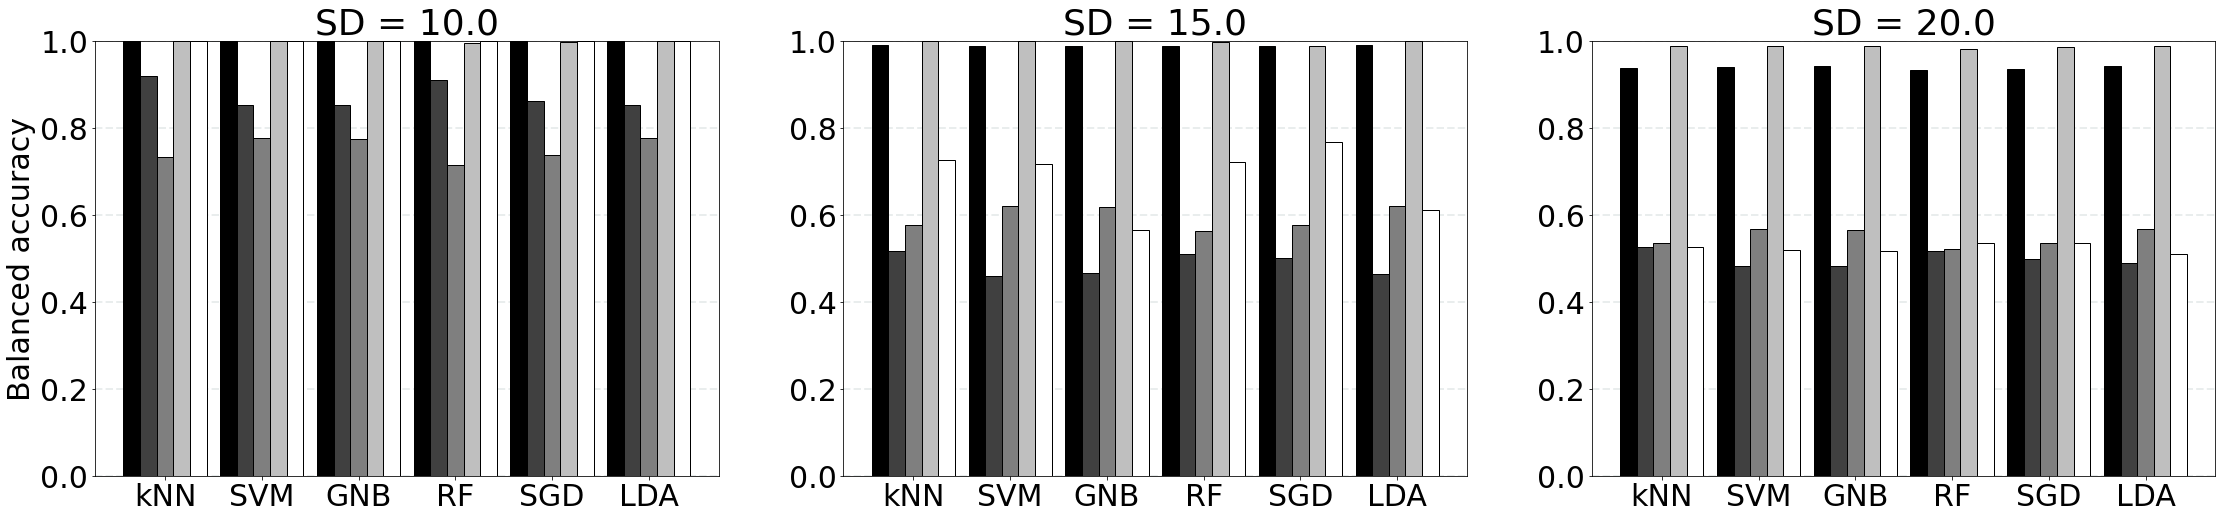

In [176]:
import matplotlib.pyplot as plt
import numpy as np

SD = [10.0, 15.0, 20.0]
Groups = val
colors = ['#000000', '#404040', '#7f7f7f', '#bfbfbf', '#ffffff']
labels = ['CST', 'PCA', 'MI', 'UMAP', 'kPCA']
width = 0.86 / len(Groups[0])
Pos = np.array(range(len(Groups[0][0]))) 

fig, axes = plt.subplots(1, 3, figsize=(45,8))
fig.set_figheight(8)
fig.set_figwidth(38)
# creating a dictionary
font = {'size': 30}
  
# using rc function
plt.rc('font', **font)

for idx, ax in enumerate(axes):

    for i in range(len(Groups[0])):
        ax.bar(Pos + i * width, Groups[idx][i], width = width, color=colors[i], edgecolor='black', label=labels[i])
        ax.set_axisbelow(True)
        ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)


    ax.set_xticks([r + width*2 for r in range(len(Groups[0][2]))])
    ax.set_xticklabels(['kNN', 'SVM', 'GNB', 'RF', 'SGD', 'LDA'])
    ax.set_ylim(0, 1)
    ax.set_title('SD = '+ str(SD[idx]))
#     ax.set_xlabel('Classifier')
    axes[0].set_ylabel('Balanced accuracy')
#     axes[0].legend(loc='lower center', bbox_to_anchor=(-1, -0.5), ncol=5)
#     plt.savefig('syn400f_1.png')
    # plt.show()

    
# plt.legend(loc='lower center', bbox_to_anchor=(-0.7, -0.3), ncol=5)
plt.savefig('syn300f_1.png', bbox_inches='tight')


# return plt


In [ ]:
new = [[0.9674538,
 0.9674850000000002,
 0.9675975999999998,
 0.9606145999999999,
 0.9649494000000001,
 0.9674850000000002,
 0.546689,
 0.5376,
 0.5137412000000001,
 0.549317,
 0.5460524,
 0.5105230000000001],[0.9877355999999999,
 0.9877355999999999,
 0.9877124,
 0.9825007999999998,
 0.9862426,
 0.9877618,
 0.5270438,
 0.5193192,
 0.5168595999999999,
 0.5343926,
 0.5350406000000001,
 0.5098024000000001],[0.9957566,
 0.9957566,
 0.9957478,
 0.9909266000000001,
 0.9920899999999999,
 0.9957566,
 0.5117232,
 0.5072178,
 0.5076946,
 0.5109084,
 0.5230546,
 0.5072184],[0.9674538,
 0.9674850000000002,
 0.9675975999999998,
 0.9606145999999999,
 0.9649494000000001,
 0.9674850000000002,
 0.546689,
 0.5376,
 0.5137412000000001,
 0.549317,
 0.5460524,
 0.5105230000000001],[0.9877355999999999,
 0.9877355999999999,
 0.9877124,
 0.9825007999999998,
 0.9862426,
 0.9877618,
 0.5270438,
 0.5193192,
 0.5168595999999999,
 0.5343926,
 0.5350406000000001,
 0.5098024000000001],[0.9957566,
 0.9957566,
 0.9957478,
 0.9909266000000001,
 0.9920899999999999,
 0.9957566,
 0.5117232,
 0.5072178,
 0.5076946,
 0.5109084,
 0.5230546,
 0.5072184],[0.9674538,
 0.9674850000000002,
 0.9675975999999998,
 0.9606145999999999,
 0.9649494000000001,
 0.9674850000000002,
 0.546689,
 0.5376,
 0.5137412000000001,
 0.549317,
 0.5460524,
 0.5105230000000001],[0.9877355999999999,
 0.9877355999999999,
 0.9877124,
 0.9825007999999998,
 0.9862426,
 0.9877618,
 0.5270438,
 0.5193192,
 0.5168595999999999,
 0.5343926,
 0.5350406000000001,
 0.5098024000000001],[0.9957566,
 0.9957566,
 0.9957478,
 0.9909266000000001,
 0.9920899999999999,
 0.9957566,
 0.5117232,
 0.5072178,
 0.5076946,
 0.5109084,
 0.5230546,
 0.5072184]]

In [2]:
import pandas as pd
df = pd.read_csv (r'/Users/aad/Feature_Transform_Proj/script_syn/classif_file.csv')
print (df)

                                                  val
0   200 2 20.0 100 1 0.2 0 0.964402 0.976384 0.975...
1   200 2 20.0 100 1 0.1 0 0.966572 0.972361 0.974...
2   200 2 20.0 100 1 0.3 0 0.961171 0.96482 0.9651...
3   200 2 20.0 100 1 0.25 0 0.948174 0.956387 0.95...
4   200 2 20.0 100 1 0.15 0 0.969593 0.975512 0.97...
..                                                ...
77  200 2 20.0 400 1 0.2 0 0.50014 0.455963 0.4677...
78  200 2 20.0 400 1 0.15 0 0.505952 0.480194 0.47...
79  200 2 20.0 400 1 0.1 0 0.493367 0.456766 0.457...
80  200 2 18.0 400 1 0.1 0 0.45 0.45 0.4 0.5 0.45 ...
81  200 2 18.0 400 1 0.1 0 0.4125 0.475 0.425 0.48...

[82 rows x 1 columns]


In [3]:
df.iloc[1][0]

'200 2 20.0 100 1 0.1 0 0.966572 0.972361 0.974186 0.96396 0.961767 0.974427 0.643472 0.721361 0.717372 0.610604 0.650965 0.71738 0.971091 0.975123 0.976813 0.969559 0.972332 0.977647 '

In [4]:
split_ratio = 5
dimensions = 3
sd = 2
lst = []
for i in range(82):
    row = df.iloc[i][0]
    v = row.split(" ")
    lst.append(v[dimensions])
    
    
# x = 
# print('{} has occurred {} times'.format(x, countX(lst, x)))

In [5]:
x = '200'
print('{} has occurred {} times'.format(x, lst.count(x)))

200 has occurred 22 times


In [173]:
df2 = pd.DataFrame(columns=list(range(26)))
for i in range(82):
    val = df.iloc[i][0].split(" ")
    if(len(val)==26):
        df2.loc[i] = val


In [219]:
sr = ['0.1', '0.15', '0.2', '0.25', '0.3']
df4 = pd.DataFrame()
for r in sr:
    df3 = df2[((df2[2]=='20.0') & (df2[5]==r) & (df2[3]=='400'))]
    
    print(df3.iloc[[-1]])
    df4 = pd.concat((df3.iloc[[-1]], df4))
    
    print('***************************')
    print(df4)
    print('***************************')



     0  1     2    3  4    5  6         7         8         9   ...        16  \
79  200  2  20.0  400  1  0.1  0  0.493367  0.456766  0.457401  ...  0.518177   

          17        18        19        20        21        22        23  \
79  0.520808  0.567218  0.945578  0.949981  0.949105  0.947678  0.947942   

          24 25  
79  0.947504     

[1 rows x 26 columns]
***************************
     0  1     2    3  4    5  6         7         8         9   ...        16  \
79  200  2  20.0  400  1  0.1  0  0.493367  0.456766  0.457401  ...  0.518177   

          17        18        19        20        21        22        23  \
79  0.520808  0.567218  0.945578  0.949981  0.949105  0.947678  0.947942   

          24 25  
79  0.947504     

[1 rows x 26 columns]
***************************
     0  1     2    3  4     5  6         7         8         9   ...  \
78  200  2  20.0  400  1  0.15  0  0.505952  0.480194  0.477251  ...   

          16        17        18        19       

In [220]:
df5 = df4.loc[:, 7:24]

In [221]:
df5 = df5.astype(float)

In [222]:
yy = df5.mean(axis=0)
yy

7     0.493764
8     0.463813
9     0.467772
10    0.498382
11    0.497298
12    0.466518
13    0.515043
14    0.543350
15    0.538379
16    0.514286
17    0.517207
18    0.547444
19    0.929617
20    0.930022
21    0.933006
22    0.924023
23    0.926063
24    0.934191
dtype: float64

In [223]:
list(yy)

[0.49376420000000004,
 0.46381259999999996,
 0.4677724,
 0.49838180000000004,
 0.4972980000000001,
 0.4665178,
 0.5150431999999999,
 0.5433496,
 0.538379,
 0.5142862,
 0.5172066,
 0.5474441999999999,
 0.929617,
 0.9300219999999999,
 0.9330058000000001,
 0.924023,
 0.9260626000000001,
 0.9341912000000001]

In [159]:
df3 = df2[((df2[2]=='20.0') & (df2[5]=='0.3') & (df2[3]=='200'))]
df3.iloc[[-1]].loc[:, 7:24]

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
22,0.691743,0.705316,0.714713,0.676122,0.678292,0.706303,0.583476,0.631839,0.632159,0.573875,0.581106,0.634605,0.956975,0.957002,0.958145,0.951273,0.949995,0.96191


In [ ]:
CST results on synthetic dataset

In [225]:
for i in range(5):
    print(i)

0
1
2
3
4


In [ ]:
#results ( original)

In [ ]:
'200-10' = [0.919132,
 0.8515701999999999,
 0.853534,
 0.9099733999999999,
 0.8628192,
 0.8530746,
 0.732751,
 0.776169,
 0.7756152000000001,
 0.7149954,
 0.7387722,
 0.7761188000000001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

'300-10' = [0.919132,
 0.8515701999999999,
 0.853534,
 0.9099733999999999,
 0.8628192,
 0.8530746,
 0.732751,
 0.776169,
 0.7756152000000001,
 0.7149954,
 0.7387722,
 0.7761188000000001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

'400-10' = [0.5064523999999999,
 0.46267899999999995,
 0.4644006,
 0.5063638,
 0.49282380000000003,
 0.46390819999999994,
 0.6416936,
 0.6941766,
 0.6925616,
 0.6215373999999999,
 0.6467784,
 0.6933638,
 0.9996538000000001,
 0.9996157999999999,
 0.9995892,
 0.9996872,
 0.999606,
 0.9997326000000001]

'200-15' = [0.7019434,
 0.6376914000000001,
 0.6391682,
 0.6820498,
 0.6459206,
 0.6408514,
 0.6402662,
 0.6878994,
 0.6879858000000001,
 0.6225305999999999,
 0.641618,
 0.6886488,
 0.9929894000000001,
 0.991748,
 0.9938687999999999,
 0.991555,
 0.9917404,
 0.9939235999999999]

'300-15' = [0.5166434,
 0.4598198,
 0.4660598,
 0.508943,
 0.5006172,
 0.4649184,
 0.5772704,
 0.6212994000000001,
 0.6182276,
 0.563898,
 0.577581,
 0.6194462000000001,
 0.9897338000000001,
 0.9873976000000001,
 0.989247,
 0.9871974000000001,
 0.9874835999999998,
 0.990174]

'400-15' = [0.46860999999999997,
 0.4324644,
 0.44066039999999995,
 0.4726468,
 0.4647042,
 0.435785,
 0.514039,
 0.5542355999999999,
 0.5541258,
 0.5099402,
 0.5217305999999999,
 0.5560746,
 0.9203081999999998,
 0.9187749999999999,
 0.9205068000000001,
 0.9185795999999999,
 0.9192776,
 0.9223429999999999]


'200-20' = [0.7734844000000001,
 0.796657,
 0.8003868000000001,
 0.7587385999999999,
 0.7723481999999999,
 0.7990581999999999,
 0.5636922,
 0.6089886,
 0.6080386,
 0.5503198000000001,
 0.5653424,
 0.6093645999999999,
 0.9582268,
 0.9595162,
 0.9621497999999999,
 0.9521264,
 0.95404,
 0.9637766000000001]

'300-20' = [0.525751,
 0.48349780000000003,
 0.4834092,
 0.5174671999999999,
 0.49744679999999997,
 0.48852419999999996,
 0.5352684,
 0.5679964,
 0.5647262000000001,
 0.5211728,
 0.5351554000000001,
 0.5683298000000001,
 0.9385060000000001,
 0.9410078000000001,
 0.9425030000000001,
 0.932006,
 0.9348266000000001,
 0.9423790000000001]

'400-20' = [0.49376420000000004,
 0.46381259999999996,
 0.4677724,
 0.49838180000000004,
 0.4972980000000001,
 0.4665178,
 0.5150431999999999,
 0.5433496,
 0.538379,
 0.5142862,
 0.5172066,
 0.5474441999999999,
 0.929617,
 0.9300219999999999,
 0.9330058000000001,
 0.924023,
 0.9260626000000001,
 0.9341912000000001]

In [36]:
import pandas as pd
df = pd.read_csv (r'/Users/aad/folder/syn_exps/classif_file_15.0_400.csv')
print (df)

                                200 2 15.0 400 1 0.1
0  0 1 1 1 1 1 1 0.784091 0.867424 0.609127 0.670...
1                              200 2 15.0 400 1 0.15
2  0 1 1 1 1 1 1 0.816277 0.798474 0.80393 0.7984...
3                               200 2 15.0 400 1 0.2
4  0 1 1 1 1 1 1 0.647807 0.62193 0.693651 0.6219...
5                              200 2 15.0 400 1 0.25
6  0 1 1 1 1 1 1 0.788996 0.788462 0.5 0.800366 0...
7                               200 2 15.0 400 1 0.3
8  0 1 1 1 1 1 1 0.513393 0.513393 0.693976 0.517...


In [37]:
df2 = pd.DataFrame(columns=list(range(12)))
for i in range(5):
    val = df.iloc[2*i][0].split(" ")
    val.pop(0), val.pop(-1), val.pop(-1)
    if(len(val)==12):
        df2.loc[i] = val

In [38]:
df2 = df2.astype(float)

In [39]:
yy = df2.mean(axis=0)
yy


0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     0.710113
7     0.717937
8     0.660137
9     0.681816
10    0.743257
11    0.661816
dtype: float64

In [83]:
val = [[],[],[],[],[]]
for i in range(len(vr_r)):
    val[i%5].append(round(vr_r[i],2))
    

In [91]:
val = [val]

In [ ]:
'20-400' = [0.9957566,
 0.9957566,
 0.9957478,
 0.9909266000000001,
 0.9920899999999999,
 0.9957566,
 0.5117232,
 0.5072178,
 0.5076946,
 0.5109084,
 0.5230546,
 0.5072184]

'20-300' = [0.9877355999999999,
 0.9877355999999999,
 0.9877124,
 0.9825007999999998,
 0.9862426,
 0.9877618,
 0.5270438,
 0.5193192,
 0.5168595999999999,
 0.5343926,
 0.5350406000000001,
 0.5098024000000001]

'20-200' = [0.9674538,
 0.9674850000000002,
 0.9675975999999998,
 0.9606145999999999,
 0.9649494000000001,
 0.9674850000000002,
 0.546689,
 0.5376,
 0.5137412000000001,
 0.549317,
 0.5460524,
 0.5105230000000001]



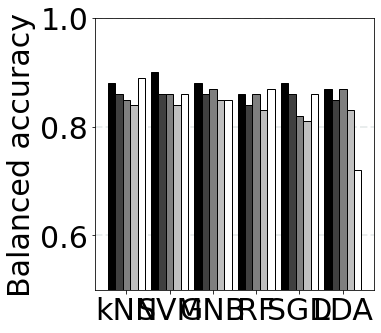

In [105]:
import matplotlib.pyplot as plt
import numpy as np

SD = [10.0, 15.0, 20.0]
Groups = val
colors = ['#000000', '#404040', '#7f7f7f', '#bfbfbf', '#ffffff']
labels = ['CST', 'PCA', 'MI', 'UMAP', 'kPCA']
width = 0.86 / len(Groups[0])
Pos = np.array(range(len(Groups[0][0]))) 

fig, axes = plt.subplots(1, 1, figsize=(5,5))
# fig.set_figheight(8)
# fig.set_figwidth(38)
# creating a dictionary
font = {'size': 10}
  
# using rc function
# plt.rc('font', **font)

ax = axes
for i in range(len(Groups[0])):
    ax.bar(Pos + i * width, Groups[idx][i], width = width, color=colors[i], edgecolor='black', label=labels[i])
    ax.set_axisbelow(True)
    ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)


ax.set_xticks([r + width*2 for r in range(len(Groups[0][2]))])
ax.set_xticklabels(['kNN', 'SVM', 'GNB', 'RF', 'SGD', 'LDA'])
ax.set_ylim(0.5, 1)
# ax.set_title('SD = '+ str(SD[idx]))
#     ax.set_xlabel('Classifier')
ax.set_ylabel('Balanced accuracy')
#     axes[0].legend(loc='lower center', bbox_to_anchor=(-1, -0.5), ncol=5)
#     plt.savefig('syn400f_1.png')
plt.show()

    
# plt.legend(loc='lower center', bbox_to_anchor=(-0.7, -0.3), ncol=5)
# plt.savefig('syn300f_1.png', bbox_inches='tight')


# return plt